<a href="https://colab.research.google.com/github/Eazlizy/unemployment-rate/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##unemployment rates


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv'
df = pd.read_csv(url)
unemployment = pd.read_csv(url)
unemployment.head(15)

,Region id,population,median income,Unemployment rates
0,1,1000000,50000,5.2
1,2,800000,45000,6.8
2,3,200000,55000,4.6
3,4,900000,48000,7.3
4,5,600000,60000,9.8
5,6,850000,42000,3.7
6,7,1300000,53000,5.5
7,8,660000,51570,7.0
8,9,904500,51850,4.1
9,10,850000,52140,6.3


In [15]:
missing_values = df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Region id             0
population            0
median income         0
Unemployment rates    0
dtype: int64


   Region id  population  median income  Unemployment rates
0          1     1000000          50000                 5.2
1          2      800000          45000                 6.8
2          3      200000          55000                 4.6
3          4      900000          48000                 7.3
4          5      600000          60000                 9.8


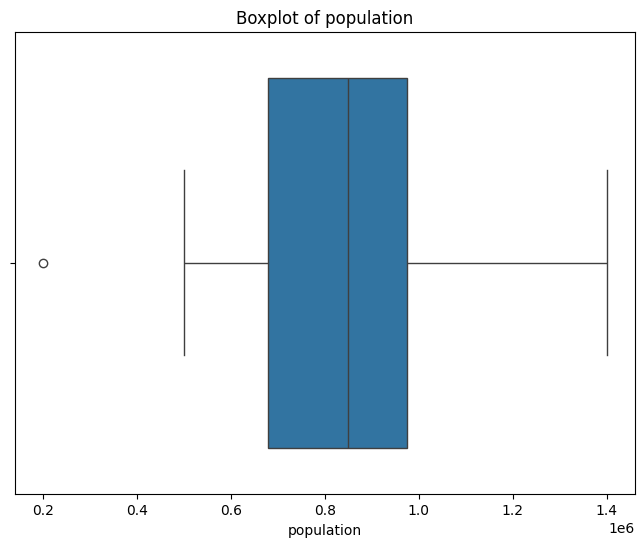


Summary Statistics for population:
count    1.500000e+01
mean     8.509667e+05
std      3.049070e+05
min      2.000000e+05
25%      6.800000e+05
50%      8.500000e+05
75%      9.750000e+05
max      1.400000e+06
Name: population, dtype: float64

Outliers for population:
   Region id  population  median income  Unemployment rates
2          3      200000          55000                 4.6


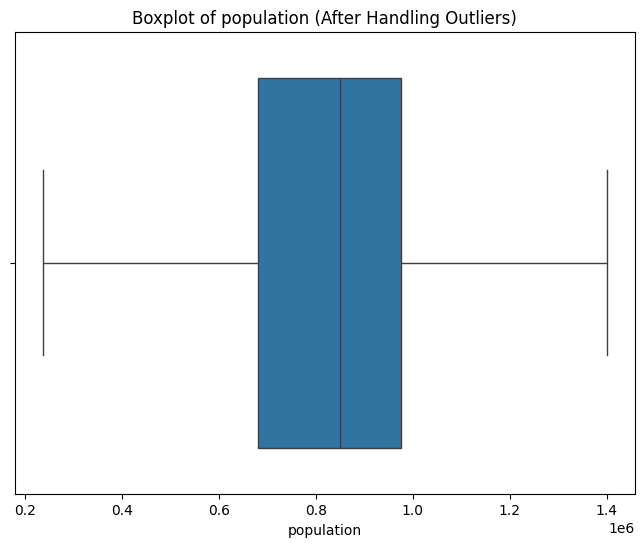

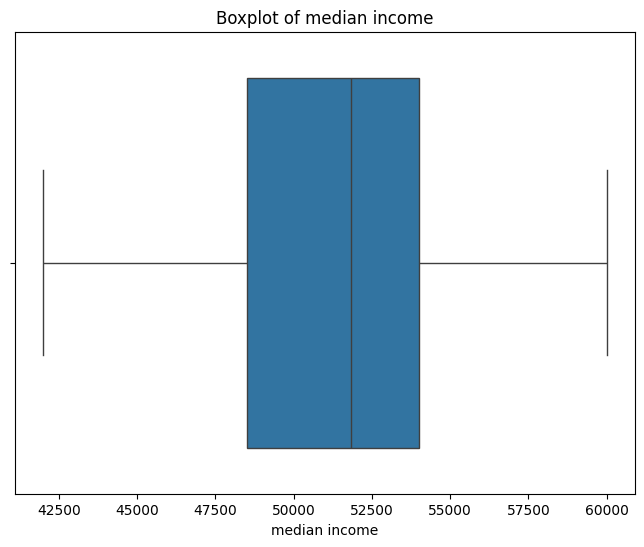


Summary Statistics for median income:
count       15.000000
mean     51170.666667
std       4985.049744
min      42000.000000
25%      48500.000000
50%      51850.000000
75%      54000.000000
max      60000.000000
Name: median income, dtype: float64

Outliers for median income:
Empty DataFrame
Columns: [Region id, population, median income, Unemployment rates]
Index: []


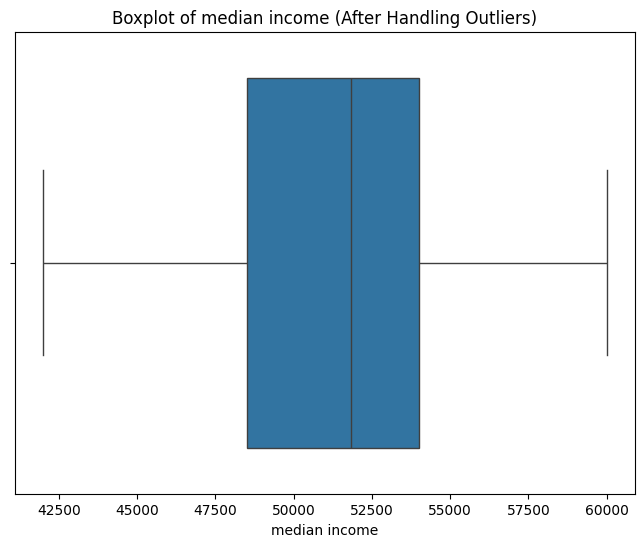

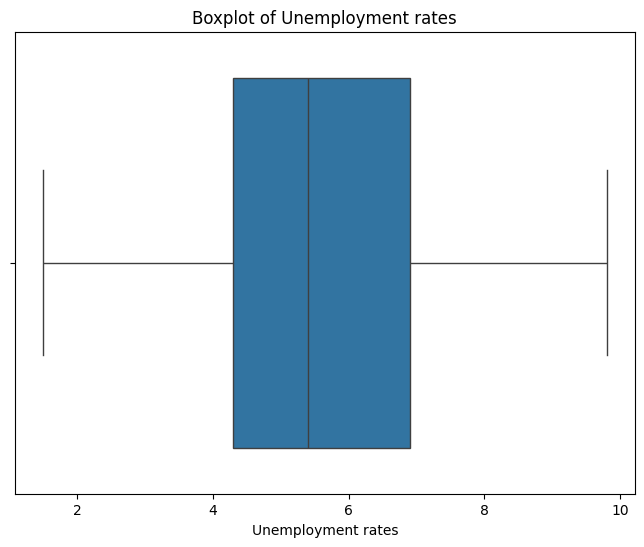


Summary Statistics for Unemployment rates:
count    15.000000
mean      5.593333
std       2.064830
min       1.500000
25%       4.300000
50%       5.400000
75%       6.900000
max       9.800000
Name: Unemployment rates, dtype: float64

Outliers for Unemployment rates:
Empty DataFrame
Columns: [Region id, population, median income, Unemployment rates]
Index: []


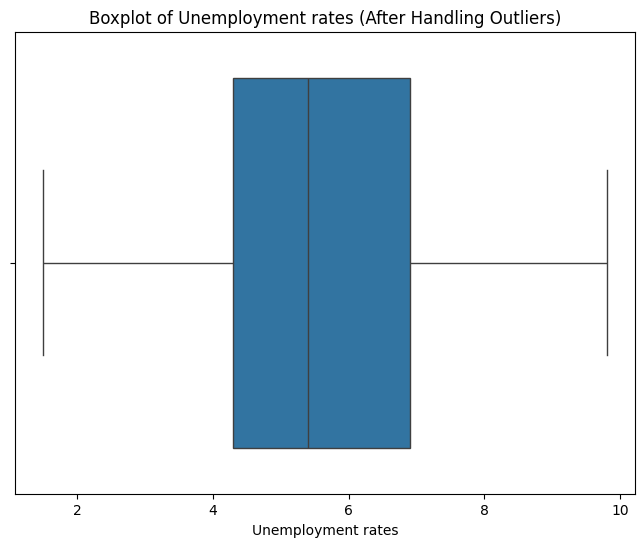

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

print(df.head())

for col in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')
    plt.show()

    summary_stats = df[col].describe()
    print(f"\nSummary Statistics for {col}:")
    print(summary_stats)

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers for {col}:")
    print(outliers)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Handling Outliers)')
    plt.xlabel(f'{col}')
    plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [20]:
url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

df_description = df.describe()
print(df_description)


       Region id    population  median income  Unemployment rates
count  15.000000  1.500000e+01      15.000000           15.000000
mean    8.000000  8.509667e+05   51170.666667            5.593333
std     4.472136  3.049070e+05    4985.049744            2.064830
min     1.000000  2.000000e+05   42000.000000            1.500000
25%     4.500000  6.800000e+05   48500.000000            4.300000
50%     8.000000  8.500000e+05   51850.000000            5.400000
75%    11.500000  9.750000e+05   54000.000000            6.900000
max    15.000000  1.400000e+06   60000.000000            9.800000


In [21]:
X = df[['Region id']].values
y = df['Unemployment rates'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [-0.13535565]
Intercept: 6.775523012552301


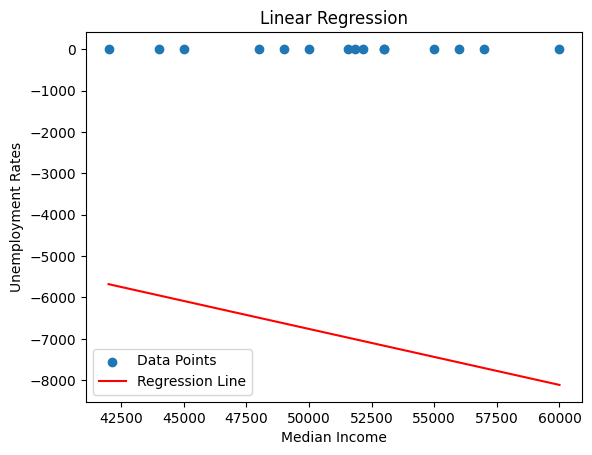

In [26]:
import numpy as np
import matplotlib.pyplot as plt

coeff = -0.13535565
intercept = 6.775523012552301

x_values = np.linspace(df['median income'].min(), df['median income'].max(), 100)

y_values = coeff * x_values + intercept

plt.scatter(df['median income'], df['Unemployment rates'], label='Data Points')

plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('Median Income')
plt.ylabel('Unemployment Rates')
plt.title('Linear Regression')
plt.legend()

plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

X = df[['population', 'median income']]
y = df['Unemployment rates']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [4.41147806e-07 4.61587099e-05]
Intercept: 2.8559592982301445


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


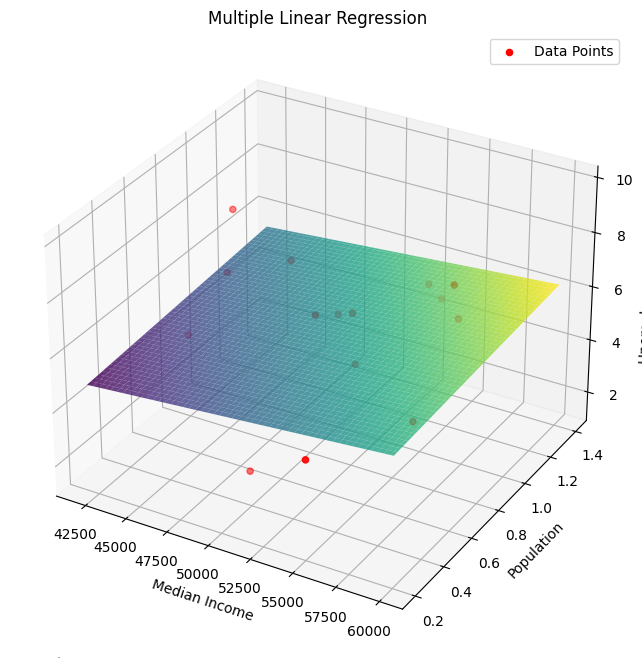

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

median_income_values = np.linspace(df['median income'].min(), df['median income'].max(), 100)

population_values = np.linspace(df['population'].min(), df['population'].max(), 100)

median_income_mesh, population_mesh = np.meshgrid(median_income_values, population_values)

unemployment_rates_predicted = model.predict(np.array([population_mesh.ravel(), median_income_mesh.ravel()]).T)

unemployment_rates_mesh = unemployment_rates_predicted.reshape(median_income_mesh.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(median_income_mesh, population_mesh, unemployment_rates_mesh, cmap='viridis', alpha=0.8)

ax.scatter(df['median income'], df['population'], df['Unemployment rates'], color='red', label='Data Points')

ax.set_xlabel('Median Income')
ax.set_ylabel('Population')
ax.set_zlabel('Unemployment Rates')
ax.set_title('Multiple Linear Regression')

plt.legend()
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

X = df[['population', 'median income']]
y = df['Unemployment rates']

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

intercept = poly_reg.intercept_
coefficients = poly_reg.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: -108.62813324896709
Coefficients: [ 0.00000000e+00  4.41689954e-11  1.48374825e-13  6.73511440e-10
  2.01582189e-11 -4.72031727e-13  1.67260650e-15 -1.20777847e-13
  1.73694949e-12 -6.84238103e-12 -1.43884190e-22 -2.13052516e-20
  1.77700930e-18 -2.99683434e-17  1.33075318e-16]


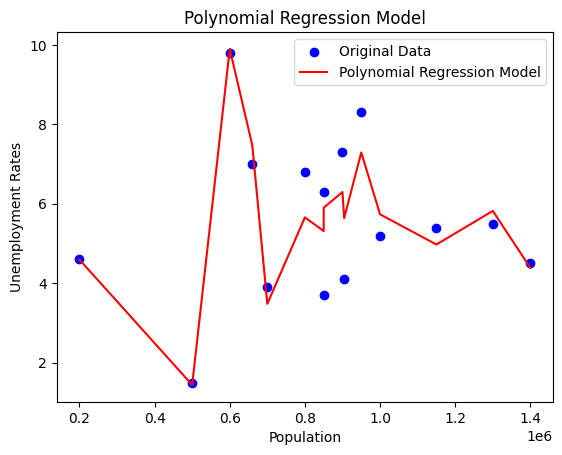

In [32]:
import matplotlib.pyplot as plt

X_poly_values = poly.transform(X)
y_pred = poly_reg.predict(X_poly_values)

sorted_indices = np.argsort(df['population'])
population_sorted = df['population'].values[sorted_indices]
unemployment_rates_sorted = df['Unemployment rates'].values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(population_sorted, unemployment_rates_sorted, color='blue', label='Original Data')

plt.plot(population_sorted, y_pred_sorted, color='red', label='Polynomial Regression Model')

plt.xlabel('Population')
plt.ylabel('Unemployment Rates')
plt.title('Polynomial Regression Model')

plt.legend()
plt.show()


In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

df['High_Unemployment'] = (df['Unemployment rates'] > df['Unemployment rates'].median()).astype(int)

X = df[['population', 'median income']]
y = df['High_Unemployment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Intercept: [-0.33753076]
Coefficients: [[ 0.08218695 -0.06664024]]
Accuracy: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion Matrix:
[[1 0]
 [2 0]]
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


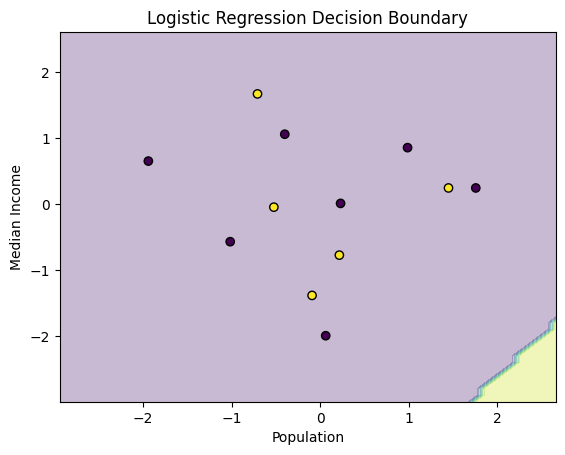

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

df['High_Unemployment'] = (df['Unemployment rates'] > df['Unemployment rates'].median()).astype(int)

X = df[['population', 'median income']]
y = df['High_Unemployment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k')

plt.xlabel('Population')
plt.ylabel('Median Income')
plt.title('Logistic Regression Decision Boundary')

plt.show()


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read the data
url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

# Prepare the data
X = df[['population', 'median income']]
y = df['Unemployment rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Print slope (coefficients) and intercept (not applicable for RF)
coefficients = model.feature_importances_
print("Slope (Feature Importances):", coefficients)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Slope (Feature Importances): [0.3318771 0.6681229]
Mean Squared Error: 2.453004666666661


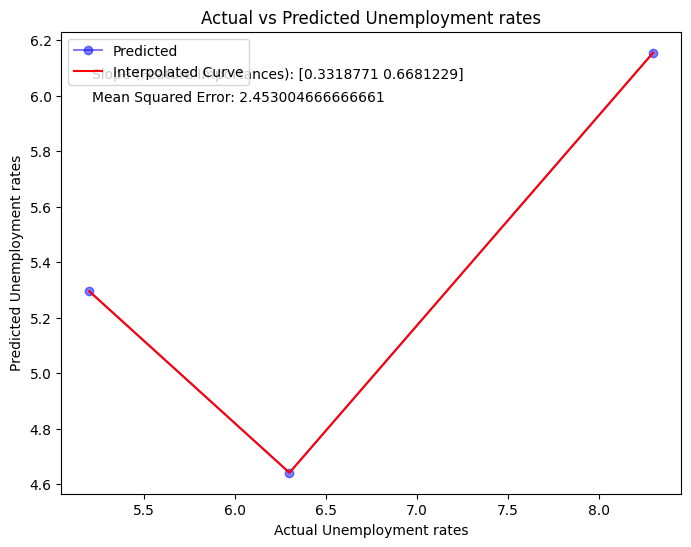

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

f = interp1d(y_test_sorted, y_pred_sorted, kind='linear')

x_values = np.linspace(y_test_sorted.min(), y_test_sorted.max(), 1000)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(y_test_sorted, y_pred_sorted, 'bo-', label='Predicted', alpha=0.5)
plt.plot(x_values, y_values, 'r-', label='Interpolated Curve')
plt.xlabel('Actual Unemployment rates')
plt.ylabel('Predicted Unemployment rates')
plt.title('Actual vs Predicted Unemployment rates')

plt.text(0.05, 0.9, f"Slope (Feature Importances): {model.feature_importances_}", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f"Mean Squared Error: {mse}", transform=plt.gca().transAxes)

plt.legend()
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

ridge_coefs = ridge.coef_

ridge_coefs_df = pd.DataFrame({'Feature Index': range(len(ridge_coefs)),
                               'Coefficient Magnitude': ridge_coefs})

print(ridge_coefs_df)


   Feature Index  Coefficient Magnitude
0              0           2.791675e-07
1              1           1.226055e-04


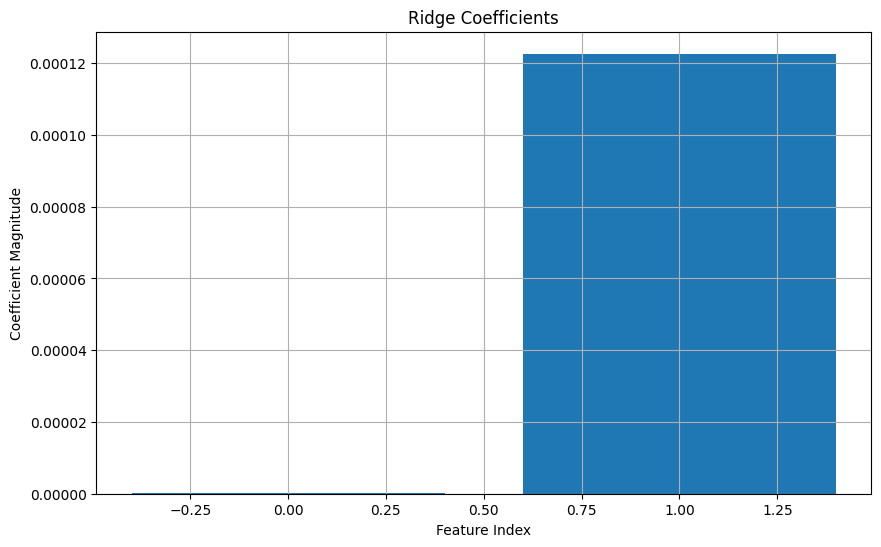

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

ridge_coefs = ridge.coef_

ridge_coefs_df = pd.DataFrame({'Feature Index': range(len(ridge_coefs)),
                               'Coefficient Magnitude': ridge_coefs})

plt.figure(figsize=(10, 6))
plt.bar(ridge_coefs_df['Feature Index'], ridge_coefs_df['Coefficient Magnitude'])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Coefficients')
plt.grid(True)
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)

lasso_coefs = lasso.coef_

lasso_coefs_df = pd.DataFrame({'Feature Index': range(len(lasso_coefs)),
                               'Coefficient Magnitude': lasso_coefs})

print(lasso_coefs_df)


   Feature Index  Coefficient Magnitude
0              0           2.791159e-07
1              1           1.225639e-04


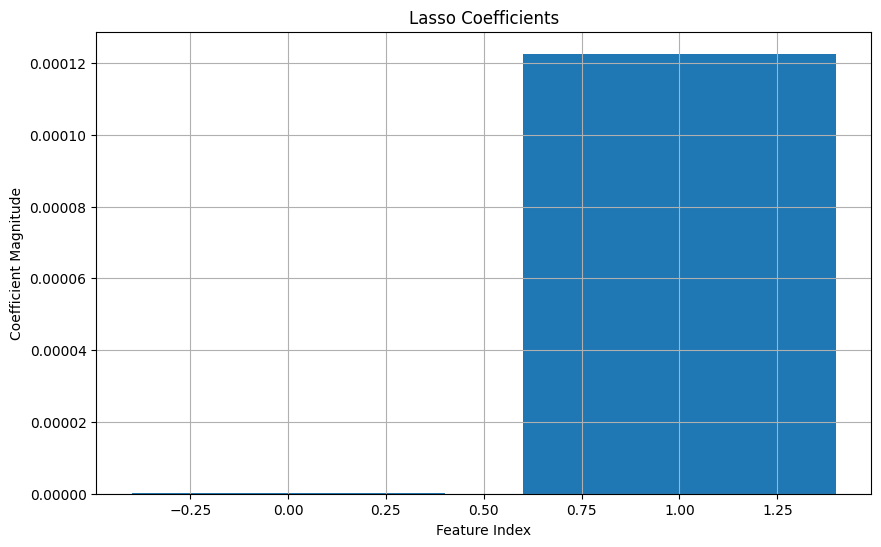

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, y_train, y_test are defined and contain the training and testing data

# Instantiate the Lasso regression model
lasso = Lasso(alpha=1.0)

# Fit the model
lasso.fit(X_train, y_train)

# Get coefficients from Lasso
lasso_coefs = lasso.coef_

# Create a DataFrame to store the coefficients, feature indices, and coefficient magnitudes
lasso_coefs_df = pd.DataFrame({'Feature Index': range(len(lasso_coefs)),
                               'Coefficient Magnitude': lasso_coefs})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(lasso_coefs_df['Feature Index'], lasso_coefs_df['Coefficient Magnitude'])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Lasso Coefficients')
plt.grid(True)
plt.show()


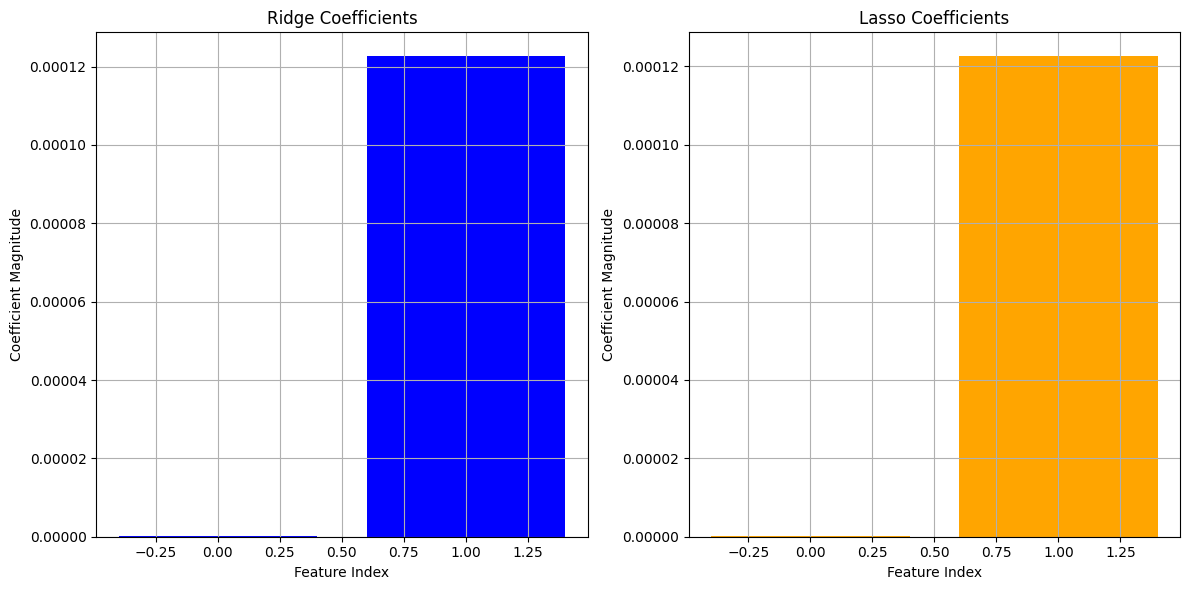

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

ridge_coefs_df = pd.DataFrame({'Feature Index': range(len(ridge_coefs)),
                               'Ridge Coefficient Magnitude': ridge_coefs})

lasso_coefs_df = pd.DataFrame({'Feature Index': range(len(lasso_coefs)),
                               'Lasso Coefficient Magnitude': lasso_coefs})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(ridge_coefs_df['Feature Index'], ridge_coefs_df['Ridge Coefficient Magnitude'], color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Coefficients')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(lasso_coefs_df['Feature Index'], lasso_coefs_df['Lasso Coefficient Magnitude'], color='orange')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Lasso Coefficients')
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

X = df.drop(columns=['Unemployment rates'])
y = df['Unemployment rates']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simple_lr = LinearRegression()
simple_lr.fit(X_train[['median income']], y_train)
y_pred_simple_lr = simple_lr.predict(X_test[['median income']])

multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
y_pred_multiple_lr = multiple_lr.predict(X_test)

poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X_train)
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
y_pred_poly_lr = poly_lr.predict(X_test_poly)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, np.where(y_train > y_train.median(), 1, 0))
y_pred_logistic = logistic_reg.predict(X_test)
accuracy_logistic = accuracy_score(np.where(y_test > y_test.median(), 1, 0), y_pred_logistic)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression',
          'Logistic Regression', 'Non-linear Regression (Random Forest)', 'Ridge Regression', 'Lasso Regression']
predictions = [y_pred_simple_lr, y_pred_multiple_lr, y_pred_poly_lr, y_pred_logistic, y_pred_rf, y_pred_ridge, y_pred_lasso]
accuracies = [None, None, None, accuracy_logistic, None, None, None]

for model, prediction, accuracy in zip(models, predictions, accuracies):
    if accuracy is not None:
        print(f"Model: {model}")
        print(f"Accuracy Score: {accuracy:.2f}")
    else:
        mse = mean_squared_error(y_test, prediction)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, prediction)
        print(f"Model: {model}")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R-squared: {r2:.2f}")
    print("-------------------------")


Model: Simple Linear Regression
MSE: 5.36
RMSE: 2.32
R-squared: -2.25
-------------------------
Model: Multiple Linear Regression
MSE: 15.87
RMSE: 3.98
R-squared: -8.64
-------------------------
Model: Polynomial Regression
MSE: 48.05
RMSE: 6.93
R-squared: -28.18
-------------------------
Model: Logistic Regression
Accuracy Score: 0.33
-------------------------
Model: Non-linear Regression (Random Forest)
MSE: 6.01
RMSE: 2.45
R-squared: -2.65
-------------------------
Model: Ridge Regression
MSE: 15.78
RMSE: 3.97
R-squared: -8.58
-------------------------
Model: Lasso Regression
MSE: 13.23
RMSE: 3.64
R-squared: -7.04
-------------------------


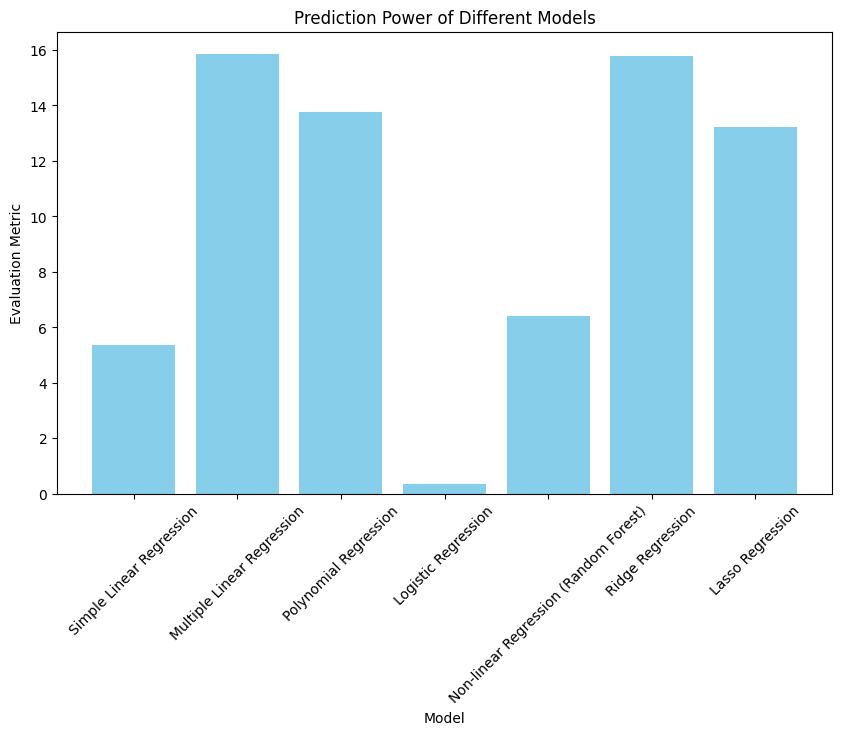

Evaluation Metrics for Different Models:
                                   Model  MSE/RMSE/R-squared/Accuracy Score
0               Simple Linear Regression                           5.359514
1             Multiple Linear Regression                          15.872971
2                  Polynomial Regression                          13.768383
3                    Logistic Regression                           0.333333
4  Non-linear Regression (Random Forest)                           6.407694
5                       Ridge Regression                          15.780104
6                       Lasso Regression                          13.233270


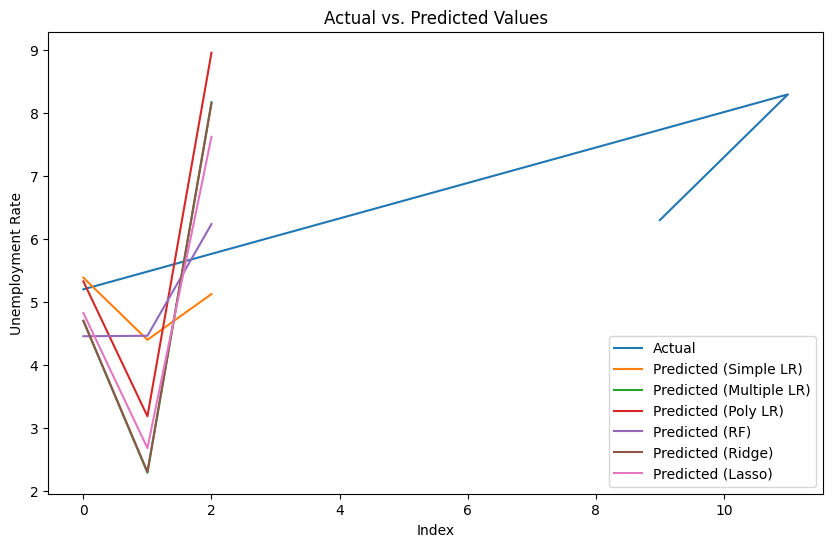

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Eazlizy/unemployment-rate/main/unemployment%20rates.csv"
df = pd.read_csv(url)

X = df.drop(columns=['Unemployment rates'])
y = df['Unemployment rates']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simple_lr = LinearRegression()
simple_lr.fit(X_train[['median income']], y_train)
y_pred_simple_lr = simple_lr.predict(X_test[['median income']])
mse_simple_lr = mean_squared_error(y_test, y_pred_simple_lr)

multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
y_pred_multiple_lr = multiple_lr.predict(X_test)
mse_multiple_lr = mean_squared_error(y_test, y_pred_multiple_lr)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
y_pred_poly_lr = poly_lr.predict(X_test_poly)
mse_poly_lr = mean_squared_error(y_test, y_pred_poly_lr)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, np.where(y_train > y_train.median(), 1, 0))
y_pred_logistic = logistic_reg.predict(X_test)
accuracy_logistic = accuracy_score(np.where(y_test > y_test.median(), 1, 0), y_pred_logistic)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression',
          'Logistic Regression', 'Non-linear Regression (Random Forest)', 'Ridge Regression', 'Lasso Regression']
metrics = [mse_simple_lr, mse_multiple_lr, mse_poly_lr, accuracy_logistic, mse_rf, mse_ridge, mse_lasso]

plt.figure(figsize=(10, 6))
plt.bar(models, metrics, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Evaluation Metric')
plt.title('Prediction Power of Different Models')
plt.xticks(rotation=45)
plt.show()

data = {
    'Model': models,
    'MSE/RMSE/R-squared/Accuracy Score': [mse_simple_lr, mse_multiple_lr, mse_poly_lr, accuracy_logistic, mse_rf, mse_ridge, mse_lasso]
}
df_metrics = pd.DataFrame(data)
print("Evaluation Metrics for Different Models:")
print(df_metrics)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_simple_lr, label='Predicted (Simple LR)')
plt.plot(y_pred_multiple_lr, label='Predicted (Multiple LR)')
plt.plot(y_pred_poly_lr, label='Predicted (Poly LR)')
plt.plot(y_pred_rf, label='Predicted (RF)')
plt.plot(y_pred_ridge, label='Predicted (Ridge)')
plt.plot(y_pred_lasso, label='Predicted (Lasso)')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
